# Ejercicios Pair Programming - Modulo 3 - Sprint 1 
## Lección 4 - Asunciones Regresión Lineal
### Pilar García Murillo y Sonia Ruiz Pérez

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:

- Normalidad (ya la deberíais haber evaluado)

- Homogeneidad de varianzas

- Independencia de las variables

Cada asunción la deberéis testar de forma visual y analítica.

In [70]:
import pandas as pd
pd.options.display.max_rows=None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import levene
import researchpy as rp

In [27]:
df = pd.read_csv("files/taxis1.csv", index_col=0)
df.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


`Como hemos visto en el pair 2, al realizar el test de Kolmogorov-Smirnov obtuvimos un p-valor < 0.05 y por tanto los datos no son normales.`

In [28]:
# Creamos un dataframe con solo las variables numéricas
df_numericas = df.select_dtypes(include=np.number)
df_numericas.head(3)

,passengers,distance,fare,tip,tolls,total
0,1,1.60,7.0,2.15,0.0,12.95
1,1,0.79,5.0,0.00,0.0,9.30
2,1,1.37,7.5,2.36,0.0,14.16


In [29]:
# Creamos un dataframe con solo las variables categóricas
df_categoricas = df.select_dtypes(include="object")
df_categoricas.head(3)

,pickup,dropoff,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


# `Homogeneidad de varianzas`

## `Homogeneidad varianzas para variables categóricas`

In [30]:
df["color"].value_counts()

yellow    5373
green      968
Name: color, dtype: int64

In [31]:
df["payment"].value_counts()

credit card    4546
cash           1795
Name: payment, dtype: int64

In [32]:
df["pickup_zone"].value_counts()

Midtown Center                  227
Penn Station/Madison Sq West    209
Upper East Side South           208
Clinton East                    208
Midtown East                    196
                               ... 
Highbridge Park                   1
Brighton Beach                    1
Bronx Park                        1
Crotona Park East                 1
Hillcrest/Pomonok                 1
Name: pickup_zone, Length: 194, dtype: int64

In [33]:
len(df["pickup_zone"].unique())

194

In [34]:
len(df["dropoff_zone"].unique())

203

In [35]:
df["pickup_borough"].value_counts()

Manhattan    5226
Queens        638
Brooklyn      378
Bronx          99
Name: pickup_borough, dtype: int64

In [36]:
df["dropoff_borough"].value_counts()

Manhattan        5172
Queens            534
Brooklyn          497
Bronx             136
Staten Island       2
Name: dropoff_borough, dtype: int64

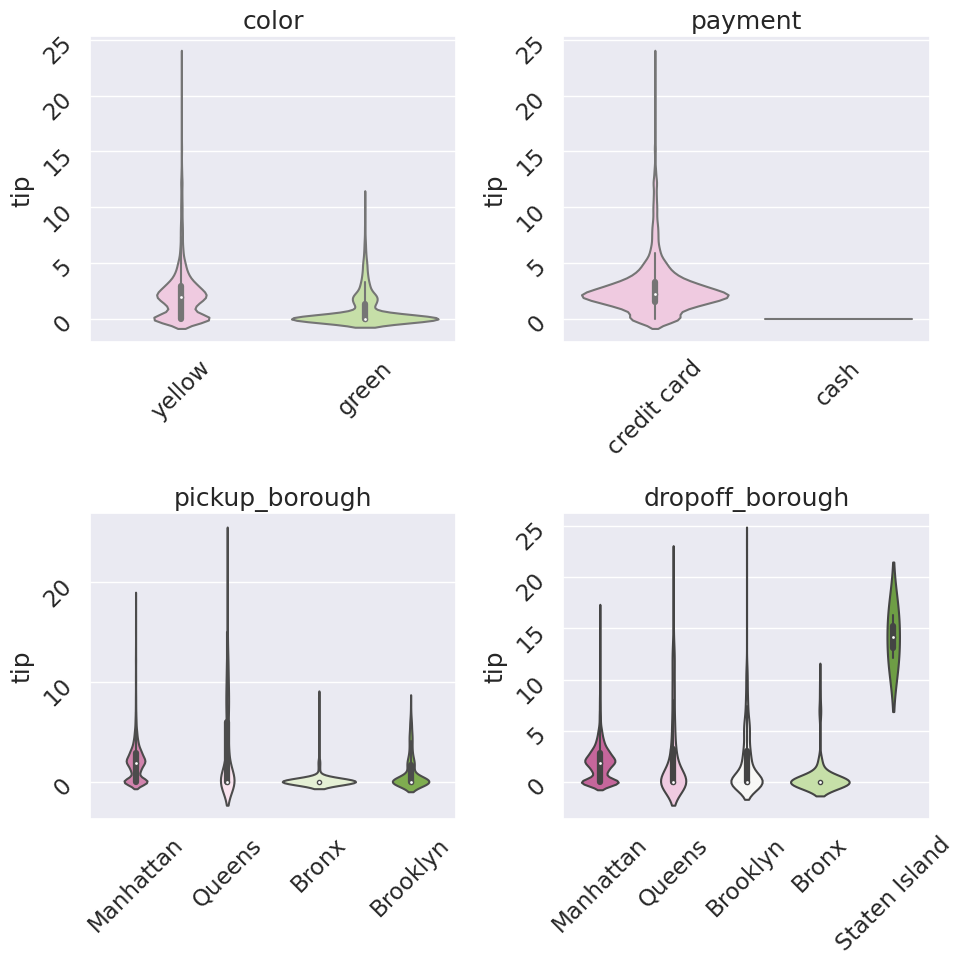

In [60]:
# Vamos a representar visualmente las 4 variables con un menor número de categorías: 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Aplanar figuras
axes = axes.flat

lista_col_categoricas = ["color", "payment", "pickup_borough", "dropoff_borough"]

for ax in fig.axes:
    ax.tick_params(labelrotation=45)

for i, columna in enumerate(lista_col_categoricas):
    #sns.boxplot(data=df, x=columna, y="tip", ax=axes[i])
    sns.violinplot(data=df, x=columna, y="tip", ax=axes[i], palette="PiYG")

    axes[i].set_title(columna)
    axes[i].set_xlabel("")

fig.tight_layout()

plt.show();

`Como podemos observar en los violinplot, no tienen una forma similar, la mediana dista entre cada una de las categorías dentro de cada variable. Para ver esto de forma analítica vamos a hacer el test de Levene, ya que queremos comprobar las varianzas entre los grupos de variables y nuestros datos no siguen una distribución normal.`

### `Columna color`

In [38]:
# Creamos un dataframe por cada categoría dentro de cada variable con nuestra variable respuesta (dependiente)
yellow = df[df["color"] == "yellow"]["tip"]
green = df[df["color"] == "green"]["tip"]

In [39]:
levene_test_color = stats.levene(yellow, green, center="median")
levene_test_color

LeveneResult(statistic=169.90483138562192, pvalue=2.406910732308715e-38)

`En el test de Levene para la columna 'color':`

- `La hipótesis nula (H0) es que las varianzas son iguales, los datos son homocedasticos.`
- `La hipótesis alternativa (H1) es que las varianzas son distintas, los datos son heterocedasticos.`
- ` Como nuestro p-valor es < 0.05, rechazamos H0, concluimos que nuestros datos son heterocedasticos.`

### `Columna payment`

In [40]:
credit_card = df[df["payment"] == "credit card"]["tip"]
cash = df[df["payment"] == "cash"]["tip"]

In [41]:
levene_test_payment = stats.levene(credit_card, cash, center="median")
levene_test_payment

LeveneResult(statistic=1037.333736460148, pvalue=6.4651831956913405e-211)

`En el test de Levene para la columna 'payment':`

- `La hipótesis nula (H0) es que las varianzas son iguales, los datos son homocedasticos.`
- `La hipótesis alternativa (H1) es que las varianzas son distintas, los datos son heterocedasticos.`
- ` Como nuestro p-valor es < 0.05, rechazamos H0, concluimos que nuestros datos son heterocedasticos.`

### `Columna pickup_borough`

In [42]:
up_manhattan = df[df["pickup_borough"] == "Manhattan"]["tip"]
up_queens = df[df["pickup_borough"] == "Queens"]["tip"]
up_bronx = df[df["pickup_borough"] == "Bronx"]["tip"]
up_brooklyn = df[df["pickup_borough"] == "Brooklyn"]["tip"]

In [43]:
levene_test_pickup_borough = stats.levene(up_manhattan, up_queens, up_bronx, up_brooklyn, center="median")
levene_test_pickup_borough

LeveneResult(statistic=169.09841075428852, pvalue=1.8543105931781837e-105)

`En el test de Levene para la columna 'pickup_borough':`

- `La hipótesis nula (H0) es que las varianzas son iguales, los datos son homocedasticos.`
- `La hipótesis alternativa (H1) es que las varianzas son distintas, los datos son heterocedasticos.`
- ` Como nuestro p-valor es < 0.05, rechazamos H0, concluimos que nuestros datos son heterocedasticos.`

### `Columna dropoff_borough`

In [44]:
off_manhattan = df[df["dropoff_borough"] == "Manhattan"]["tip"]
off_queens = df[df["dropoff_borough"] == "Queens"]["tip"]
off_bronx = df[df["dropoff_borough"] == "Bronx"]["tip"]
off_brooklyn = df[df["dropoff_borough"] == "Brooklyn"]["tip"]
off_staten_island = df[df["dropoff_borough"] == "Staten Island"]["tip"]

In [45]:
levene_test_dropoff_borough = stats.levene(off_manhattan, off_queens, off_bronx, off_brooklyn, off_staten_island, 
    center="median")
levene_test_dropoff_borough

LeveneResult(statistic=45.12153911158648, pvalue=2.0132428358249823e-37)

`En el test de Levene para la columna 'dropoff_borough':`

- `La hipótesis nula (H0) es que las varianzas son iguales, los datos son homocedasticos.`
- `La hipótesis alternativa (H1) es que las varianzas son distintas, los datos son heterocedasticos.`
- ` Como nuestro p-valor es < 0.05, rechazamos H0, concluimos que nuestros datos son heterocedasticos.`

## `Homogeneidad varianzas para variables numéricas`

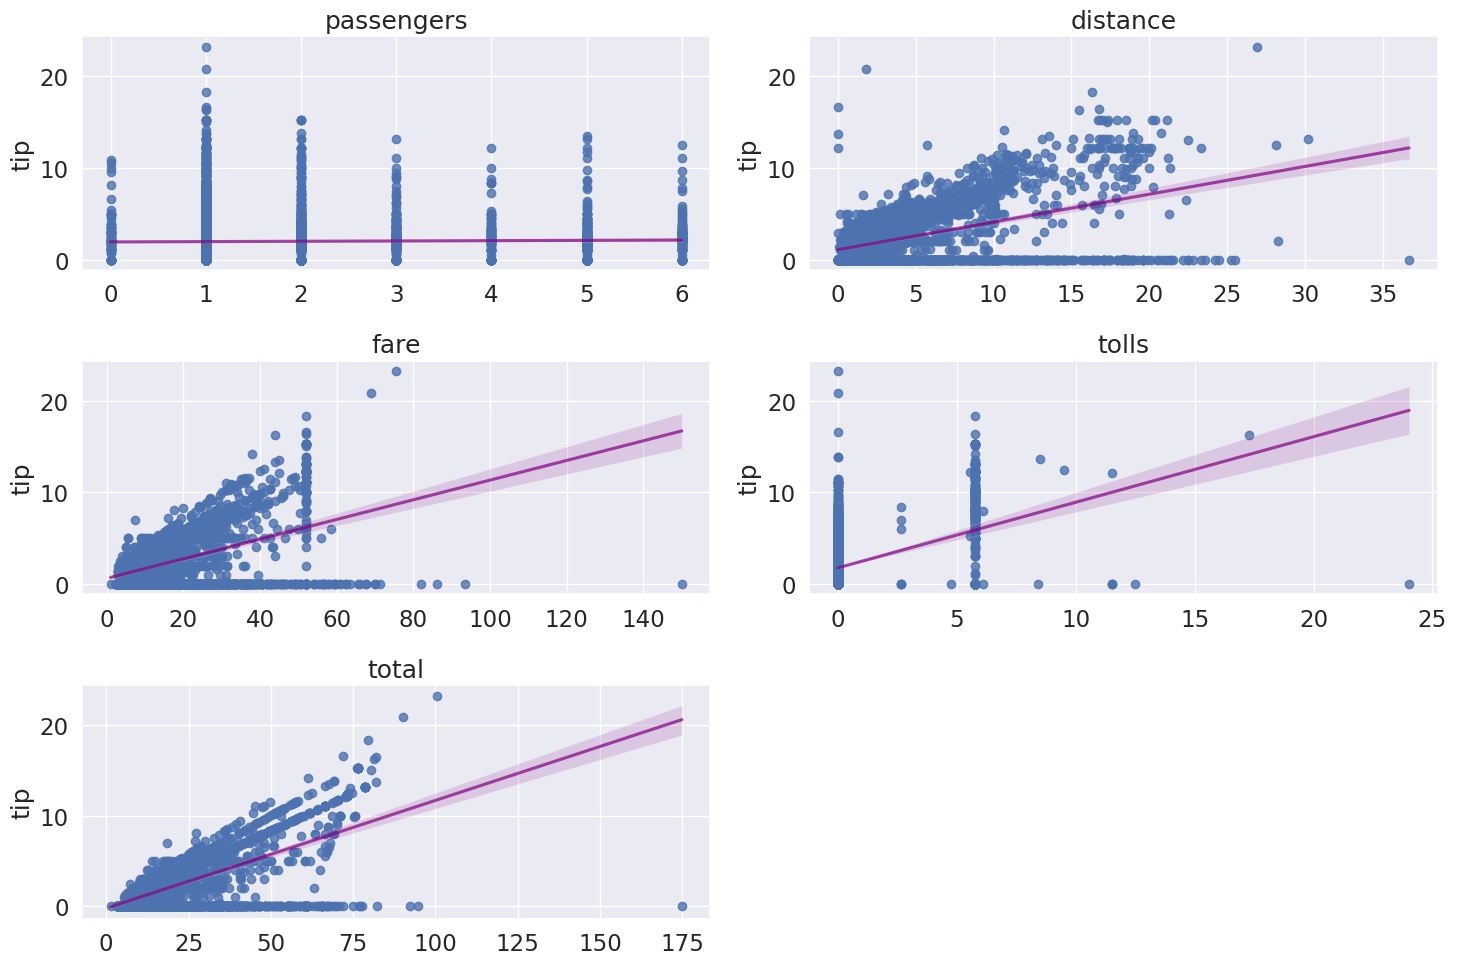

In [46]:
# Vamos a representar visualmente las 5 variables numéricas: 
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
sns.set(font_scale=1.5)

# Aplanar figuras
axes = axes.flat

lista_col_numericas = ["passengers", "distance", "fare", "tolls", "total"]

for i, columna in enumerate(lista_col_numericas):
    sns.regplot(data=df, x=columna, y="tip", line_kws={"color": "purple", "alpha": 0.7}, ax=axes[i])

    axes[i].set_title(columna)
    axes[i].set_xlabel("")

fig.tight_layout()

fig.delaxes(axes[-1])

plt.show();

`Observando las gráficas, vemos que las columnas passengers, fare y tolls no tienen homocedasticidad, ya que la dispersión de los puntos no es constante el intervalo del eje X. Sin embargo en las columnas distance y total si se puede apreciar una leve tendencia de aproximación de los puntos a la línea de regresión de manera homogénea en el eje X, exceptuando los que tienen valor 0 en la variable tip. Vamos a hacer una interpretación analítica.`

In [47]:
resultados_levene_numericas = {}

for columna in lista_col_numericas:
    # Hacemos la mediana por no ser una distribución normal
    statistic, p_value = stats.levene(df[columna], df["tip"], center="median")
    resultados_levene_numericas[columna] = p_value

resultados_levene_numericas

{'passengers': 3.7e-322,
 'distance': 4.5695632577577407e-17,
 'fare': 0.0,
 'tolls': 0.0,
 'total': 0.0}

`En el test de Levene para las columnas numéricas:`

- `La hipótesis nula (H0) es que las varianzas son iguales, los datos son homocedasticos.`
- `La hipótesis alternativa (H1) es que las varianzas son distintas, los datos son heterocedasticos.`
- ` Cuando nuestro p-valor es < 0.05, rechazamos H0, concluimos que nuestros datos son heterocedasticos.`

` Todos los valores p-value de las columnas numéricas son menores a 0.05 por tanto tienen varianzas distintas, así que son datos heterocedasticos.`

# `Independencia de las variables`

`Vamos a realizar el test Pearson Chi square para comprobar si nuestras variables categóricas son dependientes.`
- `La hipótesis nula (H0) es que nuestras variables son independientes.`
- `La hipótesis alternativa (H1) es que nuestras variables son dependientes.`

In [49]:
df_categoricas.columns

Index(['pickup', 'dropoff', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [71]:
lista_col_categoricas2 = ['color', 'payment', 'pickup_borough', 'dropoff_borough']

for i in range(len(lista_col_categoricas2)):
    while len(lista_col_categoricas2) > 1:
        crosstab, test_results, expected = rp.crosstab(df_categoricas[lista_col_categoricas2[i]], df_categoricas[lista_col_categoricas2[i+1]], 
            test="chi-square", expected_freqs=True, prop="cell")
        print(f"Los resultados de las independencias de las columnas '{lista_col_categoricas2[i]}' y '{lista_col_categoricas2[i+1]}' es: \n {test_results}")
        if len(lista_col_categoricas2) == 2:
            lista_col_categoricas2.pop(i)
        else:
            crosstab, test_results, expected = rp.crosstab(df_categoricas[lista_col_categoricas2[i]], df_categoricas[lista_col_categoricas2[i+2]], 
                test="chi-square", expected_freqs=True, prop="cell")
            print(f"Los resultados de las independencias de las columnas '{lista_col_categoricas2[i]}' y '{lista_col_categoricas2[i+2]}' es: \n {test_results}")
            if len(lista_col_categoricas2) == 3:
                lista_col_categoricas2.pop(i)
            else:
                crosstab, test_results, expected = rp.crosstab(df_categoricas[lista_col_categoricas2[i]], df_categoricas[lista_col_categoricas2[i+3]], 
                    test="chi-square", expected_freqs=True, prop="cell")
                print(f"Los resultados de las independencias de las columnas '{lista_col_categoricas2[i]}' y '{lista_col_categoricas2[i+3]}' es: \n {test_results}")
                lista_col_categoricas2.pop(i)

Los resultados de las independencias de las columnas 'color' y 'payment' es: 
                 Chi-square test  results
0  Pearson Chi-square ( 1.0) =   87.9256
1                    p-value =    0.0000
2               Cramer's phi =    0.1178
Los resultados de las independencias de las columnas 'color' y 'pickup_borough' es: 
                 Chi-square test    results
0  Pearson Chi-square ( 3.0) =   2457.5614
1                    p-value =      0.0000
2                 Cramer's V =      0.6225
Los resultados de las independencias de las columnas 'color' y 'dropoff_borough' es: 
                 Chi-square test    results
0  Pearson Chi-square ( 4.0) =   1656.9884
1                    p-value =      0.0000
2                 Cramer's V =      0.5112
Los resultados de las independencias de las columnas 'payment' y 'pickup_borough' es: 
                 Chi-square test  results
0  Pearson Chi-square ( 3.0) =   55.1664
1                    p-value =    0.0000
2                 Cramer's V 

`Tras observar los valores de p-value del test de independencia de Pearson Chi-square, de la combinación de dos a dos de cada una de nuestras variables categóricas, podemos rechazar la hipótesis nula de que las variables son independientes, es decir nuestras variables son dependientes.`

`Como nuestras variables son dependientes, vamos a observar la fuerza de esa asociación con la V de Cramer en cada uno de los test.`

`El valor de V de Cramer en teoría cuanto menor sea el valor (minimo 0), menor fuerza tendrá esa asociación y cuanto mayor es el valor (máximo 1), más fuerte es la asociación. Pero el método de programación empleado nos da el resultado a la inversa, es decir cuanto menor sea el valor, menor fuerza tendra dicha asociación y viceversa (Varía entre 0 y 1).`

- ` Para las variables 'color' y 'payment' hemos obtenido un valor de V de Cramer de 0.1178, las variables tienen una independencia baja.`

- ` Para las variables 'color' y 'pickup_borough' hemos obtenido un valor de V de Cramer de 0.6225, las variables tienen una independencia alta.`

- ` Para las variables 'color' y 'dropoff_borough' hemos obtenido un valor de V de Cramer de 0.5112, las variables tienen una independencia alta.`

- ` Para las variables 'payment' y 'pickup_borough' hemos obtenido un valor de V de Cramer de 0.0933, las variables no tienen independencia, variables dependientes.`

- ` Para las variables 'payment' y 'dropoff_borough' hemos obtenido un valor de V de Cramer de 0.1099, las variables tienen una independencia baja.`

- ` Para las variables 'pickup_borough' y 'dropoff_borough' hemos obtenido un valor de V de Cramer de 0.5820, las variables tienen una independencia alta.`

Happy coding 📈📊📉